# Visualization of the simulation outputs

To understand the concrete impacts of a set of policy inputs on the transporation network, we have provided an utility called `visualization.py` (located in the `/utilities` folder) to:

- **Visualize** the inputs and outputs of each BISTRO run
- **Compare** the inputs and outputs of each BISTRO run **to the BAU scenario**. <br> 

In this notebook, we demonstrate the use of the script with the outputs of a random run located in the `examples/example_run_output_folder` folder but you can use it for any other BISTRO run by adapting the paths accordingly.

*Note 1*: This notebook and accompanying utilities are written in Python 3.6.8. Please install associated requirements using the provided `requirements.txt` in the root folder.

*Note 2*: It is assumed that this notebook is started from the `/examples` folder.

The notebook is organized as follows:<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span><ul class="toc-item"><li><span><a href="#Data-to-be-modified-by-the-user" data-toc-modified-id="Data-to-be-modified-by-the-user-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data to be modified by the user</a></span></li><li><span><a href="#Fixed-data" data-toc-modified-id="Fixed-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fixed data</a></span></li></ul></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inputs</a></span><ul class="toc-item"><li><span><a href="#Incentives" data-toc-modified-id="Incentives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incentives</a></span></li><li><span><a href="#FleetMix" data-toc-modified-id="FleetMix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>FleetMix</a></span></li><li><span><a href="#Fares" data-toc-modified-id="Fares-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fares</a></span></li><li><span><a href="#Bus-frequency" data-toc-modified-id="Bus-frequency-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bus frequency</a></span></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores</a></span></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Mode-Choice-by-hour-of-the-day" data-toc-modified-id="Mode-Choice-by-hour-of-the-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mode Choice by hour of the day</a></span></li><li><span><a href="#Mode-Choice-per-income-group" data-toc-modified-id="Mode-Choice-per-income-group-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mode Choice per income group</a></span></li><li><span><a href="#Mode-Choice-per-age-group" data-toc-modified-id="Mode-Choice-per-age-group-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mode Choice per age group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Secondary-locations-trips" data-toc-modified-id="Secondary-locations-trips-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Secondary locations trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time-by-mode" data-toc-modified-id="Average-travel-time-by-mode-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average travel time by mode</a></span></li><li><span><a href="#Travel-time-by-mode-over-the-day" data-toc-modified-id="Travel-time-by-mode-over-the-day-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Travel time by mode over the day</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

In [171]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import seaborn as sns
sns.set()
%matplotlib inline

# Adding the module to the path for future import
# Note that the following is idempotent when this notebook is run from "/examples"
import sys
import os
from os import path
from pathlib import Path
os.chdir('../utilities')
import visualization as viz
import plans_parser as parser
from fixed_data_visualization import *

import tqdm
import math

# To parse .xml output files
from lxml import etree


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing the data 

### Data to be modified by the user

To use this notebook for other scenarios than the BAU, change: <br> 
* the `path_output_folder` of the run (`sioux_faux-<sample_size>__<date and time>` folder) <br>
* the `iter_number` (number of iterations of the run: integer)
* the `sample_size` (sample size of the simulated scenario: string, '1k' or '15k')

In [146]:
# ********** CHANGE SAMPLE_SIZE (string) *******************#
# '1k' or '15k'
sample_size = '15k'

# ********** CHANGE iter_number (integer) *******************#
iter_number = 20
ITER_FOLDER = f"it.{iter_number}"

# ********** CHANGE PATH OUTPUT FOLDER (pathlib.Path object)*****************#
path_output_folder = Path.cwd().parent / EXAMPLES / "example_run_output_folder"


### Fixed data 

Create instancea of the classwa `ReferenceData` and `ResultFiles` to import fixed data needed further.

In [178]:
ref = ReferenceData(sample_size)
res_bau = ResultFiles(ref.path_output_folder_bau, ref)
res_scenario = ResultFiles(path_output_folder, ref)

## Inputs

### Incentives

Importing the `ModeIncentives.csv ` input file for the BAU scenario and your new scenario.

In [148]:
incentives_data_bau = res_bau.incentives_data
incentives_data = res_scenario.incentives_data

Plotting the `incentives` inputs for the BAU scenario and your new scenario. <br>For the BAU, no incentives are provided. 

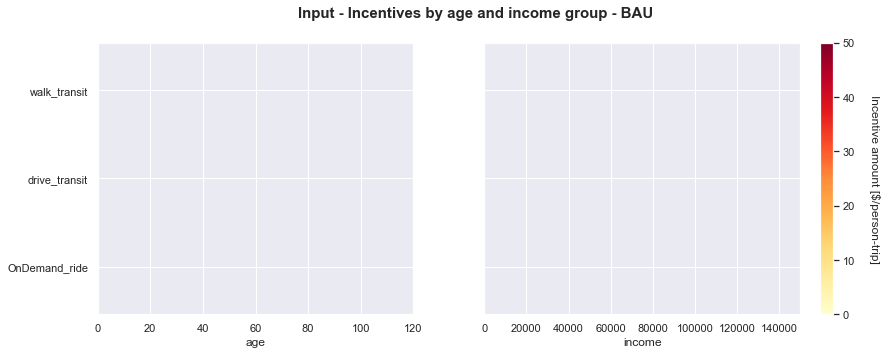

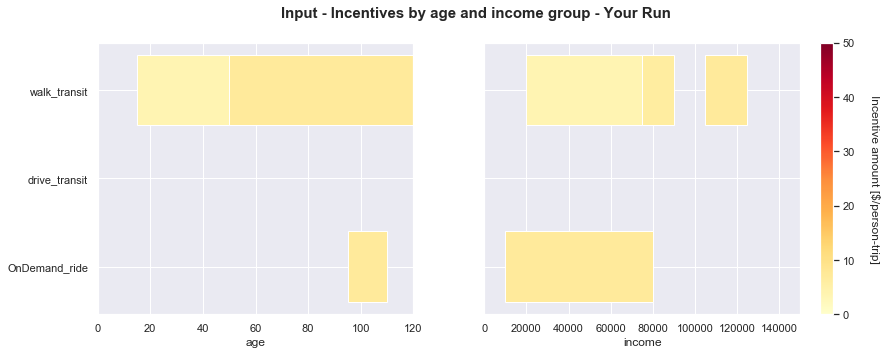

In [149]:
_ = viz.plot_incentives_inputs(incentives_data_bau, max_incentive, max_age, max_income, "BAU")
_ = viz.plot_incentives_inputs(incentives_data, max_incentive, max_age, max_income, "Your submission")

### FleetMix

Importing the `FleetMix.csv ` input file

In [150]:
fleet_mix_data_bau = res_bau.fleet_mix_data
fleet_mix_data = res_scenario.fleet_mix_data

Plotting the `vehicle fleet mix` inputs for the BAU scenario and your new scenario. <br>For the BAU, all bus lines are operating with `BUS-DEFAULT` buses. 

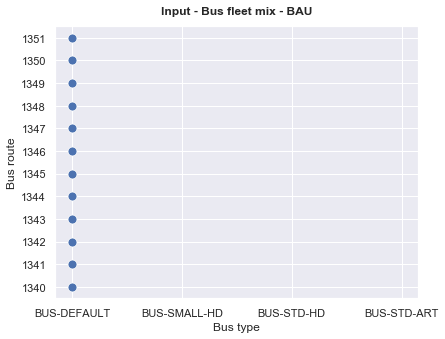

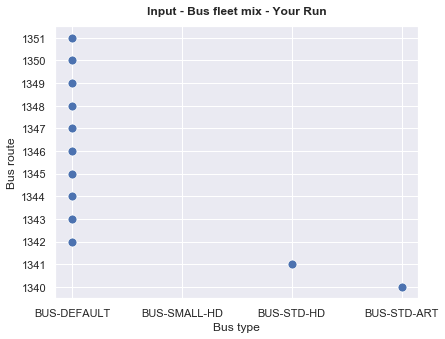

In [151]:
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_data_bau, route_ids, buses_list, agency_ids, "BAU")
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_data, route_ids, buses_list, agency_ids, "Your submission")

### Fares

Importing the `MassTransitFares.csv` input file for the BAU scenario and your new scenario.

In [153]:
fares_data_bau = res_bau.bus_fares_data
fares_data = res_scenario.bus_fares_data

Plotting the Mass Transit Fares inputs for the BAU scenario and your new scenario. <br><br> For the BAU, the Sioux Faux bus fare policy works as follow: 
* Children 5 yrs. and under\: FREE
* Children 6 to 10 yrs.\: \$0.75
* Children 11 to 18 yrs and Adults 65 yrs. and under: \$1.50
* Persons over 65 yrs\: FREE

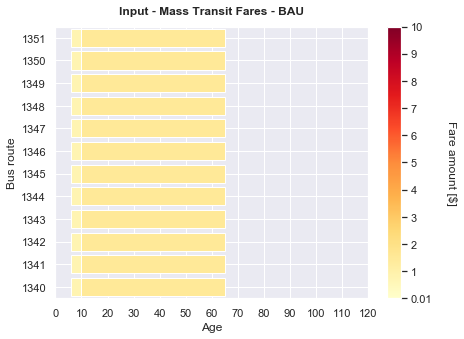

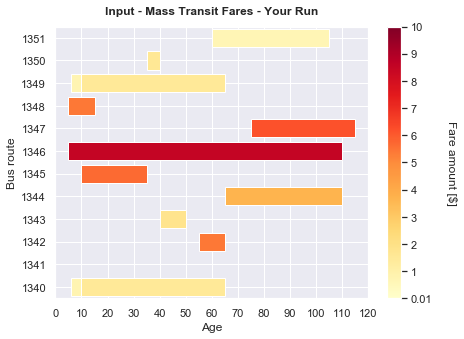

In [155]:
_ = viz.plot_mass_transit_fares_inputs(fares_data_bau, fares_data_bau, max_fare, route_ids, "BAU")
_ = viz.plot_mass_transit_fares_inputs(fares_data, fares_data_bau, max_fare, route_ids, "Your submission")

### Bus frequency

Importing the `FrequencyAdjustment.csv` input files for the BAU scenario and the new run scenario.

In [166]:
bus_frequencies_data = res_scenario.bus_frequency_data
bus_frequencies_data
len(bus_frequencies_data.route_id)

0

Note that the `FrequencyAdjustement.csv` input file of the BAU is empty as the BAU bus schedule is a non-frequency based schedule. There was not any function implemented to plot the frequencies.txt file of hte BAU bus schedule.
<br> Thus, this section 2.4 will be useful to plot the `FrequencyAdjustement.csv` input file of new runs (with different inputs than the BAU) only.

Plotting the `Bus frequency` inputs for the new scenario.

No handles with labels found to put in legend.


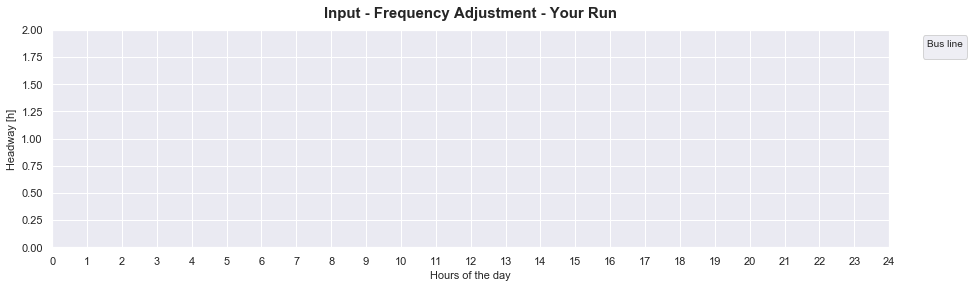

In [168]:
_ = viz.plot_bus_frequency(bus_frequencies_data, route_ids, "Your submission")

## Scores

Importing the `submissionScores.csv` file for the new scenario.

In [174]:
scores_data = res_scenario.scores_data


Plotting the `weighted scores` for the new scenario. <br> When the subscore is smaller than 1, it means that the new scenario performs better than the BAU scenario.

No handles with labels found to put in legend.


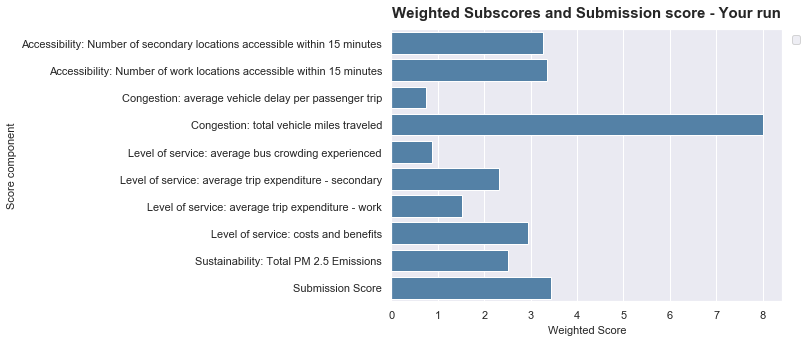

In [177]:
_ = viz.plot_weighted_scores(scores_data, "Your submission")

## Mode choice

### Overall mode choice

Importing the `modeChoice.csv` output file for the BAU scenario and your new scenario.

In [182]:
mode_choice_data_bau = res_bau.mode_choice_data
mode_choice_data = res_scenario.mode_choice_data

Plotting the `Overall Mode Choice` output for the BAU scenario and your new scenario.

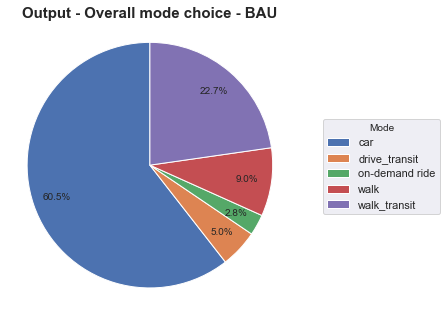

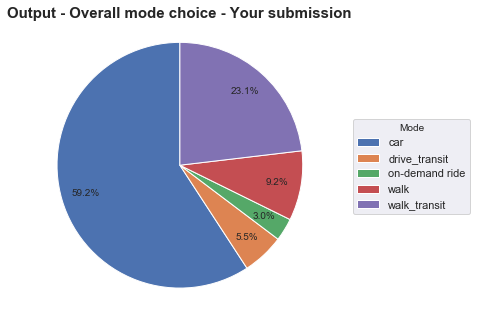

In [183]:
_ = viz.plot_overall_mode_choice(mode_choice_data_bau, "BAU")
_ = viz.plot_overall_mode_choice(mode_choice_data, "Your submission")

### Mode Choice by hour of the day

Importing the `{iter_number}.modeChoice.csv`output file. <br> (For the BAU scenario, `iter_number` = 100)

In [184]:
mode_choice_path_bau = ref.path_output_folder_bau / ITERS / "it.100" / "100.modeChoice.csv"
mode_choice_path = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.modeChoice.csv"


Plotting the `Mode Choice by hour of the day` output for the BAU scenario and your new scenario.

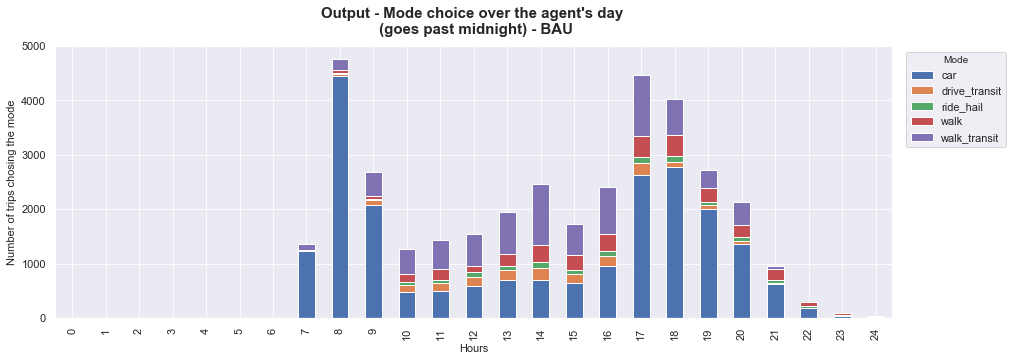

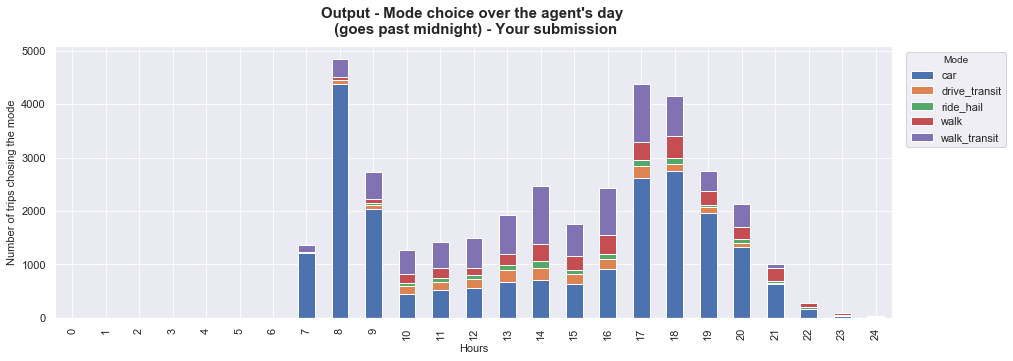

In [186]:
_ = viz.plot_mode_choice_by_hour(mode_choice_path_bau, "BAU")
_ = viz.plot_mode_choice_by_hour(mode_choice_path, "Your submission")

### Mode Choice per income group

Plotting the `Mode choice per income group` output for the BAU scenario and your new scenario.

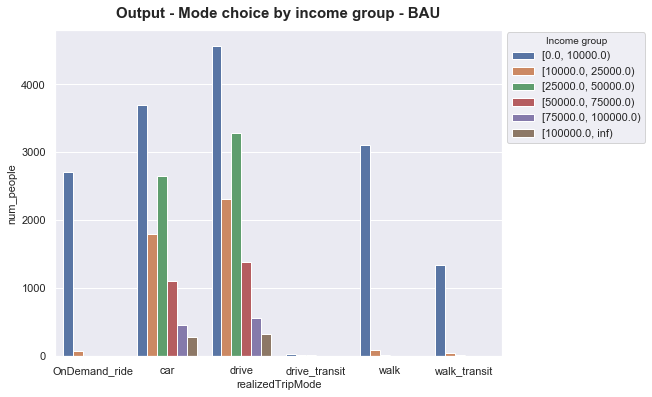

In [28]:
# _ = viz.plot_mode_choice_by_income_group(person_df_bau, trips_df_bau, "BAU")
# _ = viz.plot_mode_choice_by_income_group(person_df, trips_df, "Your Submission")

### Mode Choice per age group

Plotting the `Mode choice per age group` output for the BAU scenario and your new scenario..

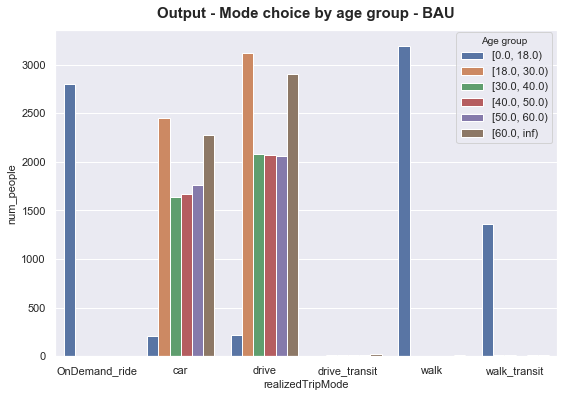

In [29]:
_ = viz.plot_mode_choice_by_age_group(person_df_bau, trips_df_bau, "BAU")
# _ = viz.plot_mode_choice_by_age_group(person_df, trips_df, "Your Run")

## Accessibility

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

### Work-based trips

In [33]:
# _ = viz.plot_accessibility(sample_name, network_file, bau_linkstats_file, population_file, utm_zone, poi_types, time_ranges, max_time, morning_peak, evening_peak, "BAU")


### Secondary locations trips

## Level of service

### Travel expenditure

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.

In [32]:
# _ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(trips_df_bau, "BAU")
# _ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(trips_df, "Your Run")

### Bus crowding

Plotting the `Average Hours of Bus Crowding` output for the BAU scenario and your new scenario.

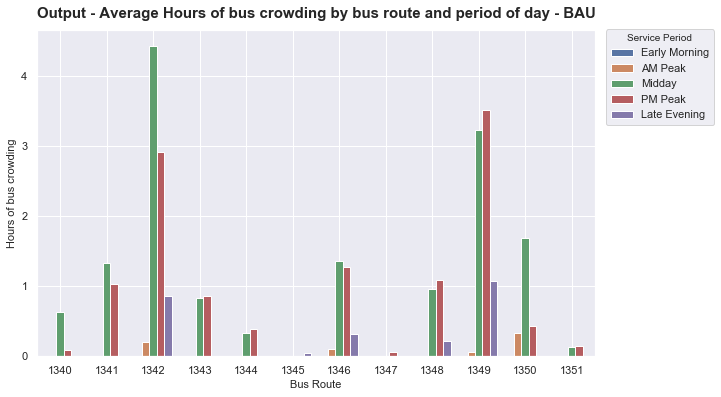

In [35]:
# _ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_traversals_df_bau, trip_to_route, seating_capacities, transit_scale_factor, "BAU")
# _ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_traversals_df, trip_to_route, seating_capacities,transit_scale_factor, "Your Run")


## Congestion

### Average travel time by mode

Importing the `averageTravelTimes.csv` output file for the BAU scenario and your new scenario.

In [187]:
travel_time_data_bau = ref.path_output_folder_bau / ITERS / "it.100" / "100.averageTravelTimes.csv"
travel_time_data = path_output_folder / ITERS / ITER_FOLDER / f"{iter_number}.averageTravelTimes.csv"

Plotting the `Average travel time by mode` output.

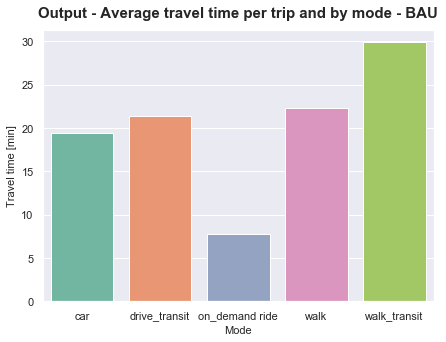

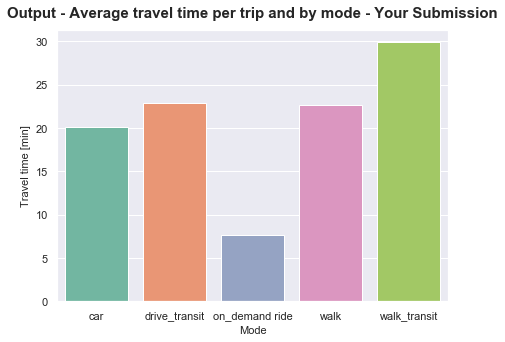

In [188]:
_ = viz.plot_travel_time_by_mode(travel_time_data_bau, "BAU")
_ = viz.plot_travel_time_by_mode(travel_time_data, "Your Submission")

### Travel time by mode over the day

Plotting the `Travel time by mode over the day` output for the BAU scenario and your new scenario.

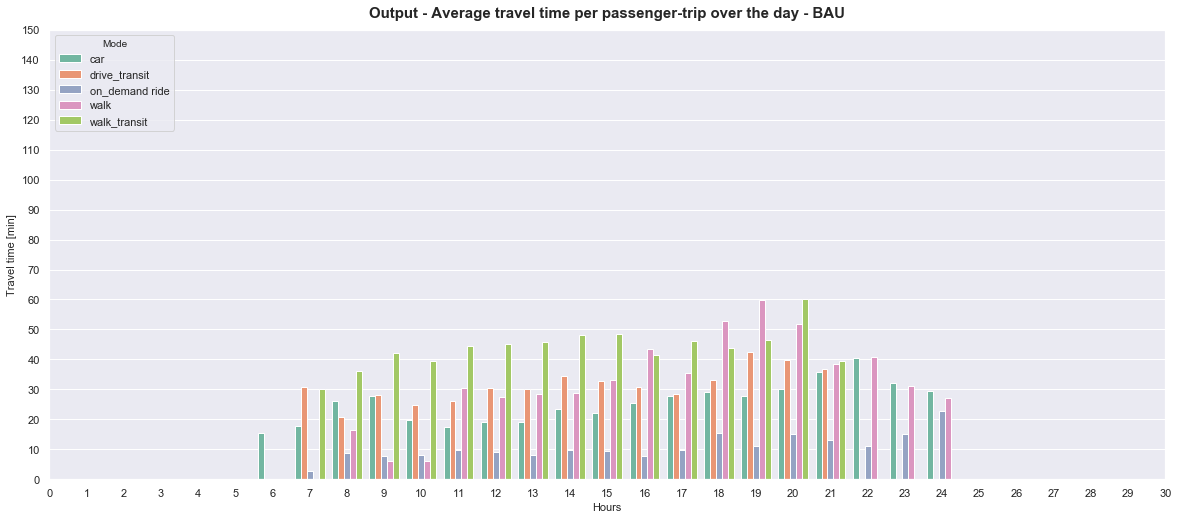

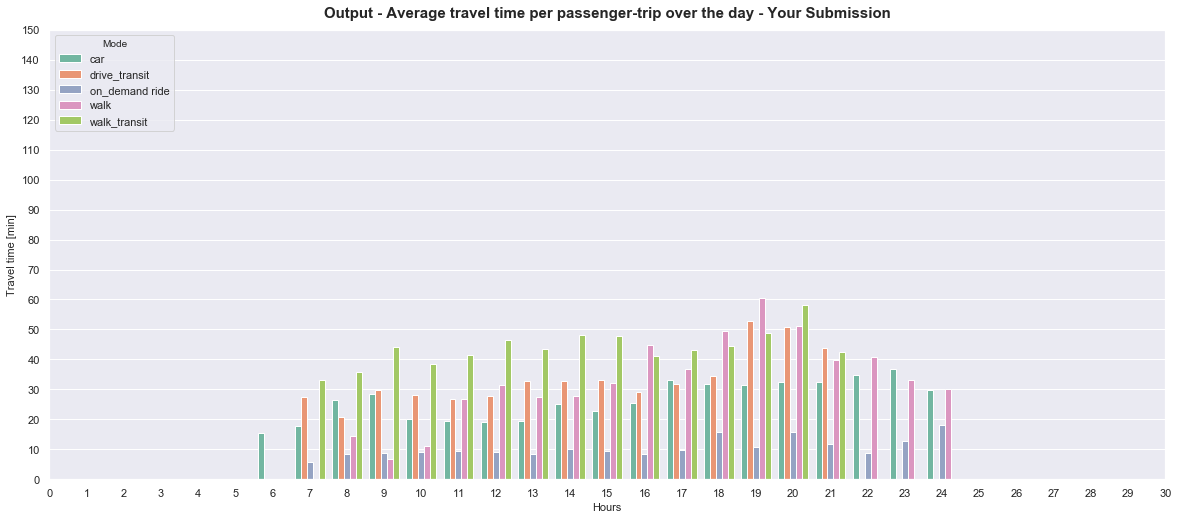

In [190]:
_ = viz.plot_travel_time_over_the_day(travel_time_data_bau, "BAU")
_ = viz.plot_travel_time_over_the_day(travel_time_data, "Your Submission")


## Costs and Benefits of Mass Transit Level of Service Intervention

Plotting the `Costs and Benefits by route` output for the BAU scenario and your new scenario.

In [59]:
legs_df_bau.loc[legs_df_bau["mode"=="bus"]]

,Unnamed: 0,PID,Trip_ID,Leg_ID,Mode,Veh,Veh_type,Start_time,End_time,Duration,Distance,Path,Fuel,fuelType,FuelCost,Fare
0,0,100-2012000131467-02341,100-2012000131467-02341_t-1,100-2012000131467-02341_t-1_l-0,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,55234.0,56220.0,986,1275.678,"1609,2430,5290,3971,3686,1097,4277,1507,5287,5289",8.382242e+04,Food,0.0,0.000000
1,1,100-2012000131467-02341,100-2012000131467-02341_t-1,100-2012000131467-02341_t-1_l-1,bus,siouxareametro-sd-us:t_75345_b_219_tn_2,BUS-DEFAULT,56220.0,58254.0,2034,13856.169,"['636,5286,1506,4276,1096,3687,3970,5291,2431', '2431,1608', '1608,5294,1286,5298', '5298,1648,854', '854,5302,2202', '2202,5306,3436', '3436,5310,5315,1569', '1569,1692', '1692,5318,3748,601,5323,661', '661,2578,4321,5327', '5327,3539,5331,217', '217,2013,1848,3206', '3207,2711,988,2948,1826', '1827,1125,5343,1967', '1967,5347', '5347,895,3051,5351,2007', '2007,1297,2223,2110', '2110,5890,784,1083,3742,618', '618,5354,5359,5247', '5247,3039,5243,5363,1065', '1065,5367,2655', '2655,4220,4904,4909,3175', '3175,1163,1820,1527,3009,5491,3111,2079,4365,659']",0.000000e+00,Diesel,0.0,0.000000
2,2,100-2012000131467-02341,100-2012000131467-02341_t-1,100-2012000131467-02341_t-1_l-1,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,58254.0,58294.0,40,49.923,"5500,1619",2.645919e+03,Food,0.0,0.000000
3,3,100-2012000131467-02341,100-2012000131467-02341_t-1,100-2012000131467-02341_t-1_l-1,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,55234.0,56220.0,986,1275.678,"1609,2430,5290,3971,3686,1097,4277,1507,5287,5289",8.382242e+04,Food,0.0,0.000000
4,4,100-2012000131467-02341,100-2012000131467-02341_t-1,100-2012000131467-02341_t-1_l-2,bus,siouxareametro-sd-us:t_75357_b_219_tn_2,BUS-DEFAULT,57900.0,58254.0,354,2572.045,"['659,3949,2847,1489,204,4369,2045', '2044,4368,1432,3588,4372', '4372,4178', '4178,4376,3094,3906,3386', '3386,4380,1060,4160,1077,4497', '4497,4493,5495,877', '877,5499,1619']",0.000000e+00,Diesel,0.0,0.000000
5,5,100-2012000131467-02341,100-2012000131467-02341_t-1,100-2012000131467-02341_t-1_l-2,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,58254.0,58294.0,40,49.923,"5500,1619",2.645919e+03,Food,0.0,0.000000
6,6,100-2012000131467-02341,100-2012000131467-02341_t-2,100-2012000131467-02341_t-2_l-0,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,58849.0,59220.0,371,477.559,"5658,1618,5498,876,5494,4495",4.155757e+04,Food,0.0,0.000000
7,7,100-2012000131467-02341,100-2012000131467-02341_t-2,100-2012000131467-02341_t-2_l-1,bus,siouxareametro-sd-us:t_501374_b_219_tn_0,BUS-DEFAULT,59220.0,60450.0,1230,2044.648,"['5494,4492,4496', '4496,1076,2884,2794,1278,3590', '3590,4500,4504', '4504,4002,3582,712', '713,2166', '2166,4512,1488,2846,3948,658']",0.000000e+00,Diesel,0.0,0.000000
8,8,100-2012000131467-02341,100-2012000131467-02341_t-2,100-2012000131467-02341_t-2_l-1,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,60450.0,62214.0,1764,2283.800,"5130,523,3743,1082,785,5891,2111,1003,1266,4190,3970,5291,2431",1.210414e+05,Food,0.0,0.000000
9,9,100-2012000131467-02341,100-2012000131467-02341_t-2,100-2012000131467-02341_t-2_l-1,walk,body-100-2012000131467-02341,BODY-TYPE-DEFAULT,58849.0,59220.0,371,477.559,"5658,1618,5498,876,5494,4495",4.155757e+04,Food,0.0,0.000000


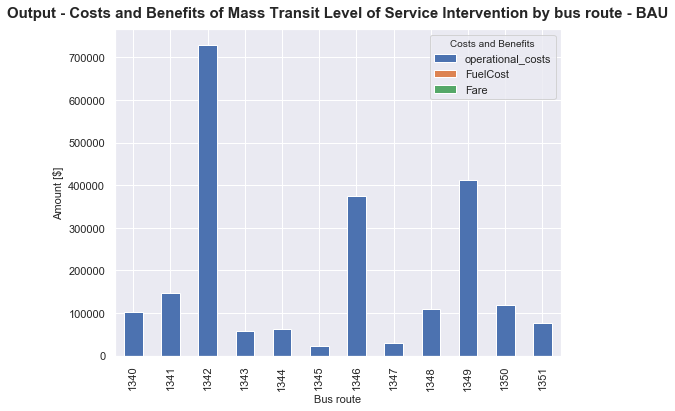

In [58]:
_ = viz.plot_cost_benefits(paths_traversals_df_bau, legs_df_bau, operational_costs, trip_to_route, "BAU")
# _ = viz.plot_cost_benefits(legs_df, operational_costs, trip_to_route, "Run")

## Sustainability

The data needed for this plot has not been processed yet. Therefore, the plot will not be accessible for the Hackathon.